# PCLab#1 - Group 1 
### Petter, Oskar, Johannes

## Task #1 :Import the data and describe the sample

In [495]:
import pandas as pd 

In [496]:
df = pd.read_csv('data/Data_PCLab1_Stock.csv')

In [497]:
df.head()


Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

• Check if data contains any null values

In [498]:
#check for any missing data... there is none, because 2159 non-null entries for 2159 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [499]:
# Set "Date" as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

• Sort the stock data by date and print the number of stocks

In [500]:
#sort by date
df_sort = df.sort_index()
#number of stocks 
stocks = df_sort.columns[:-1]
num_stocks = len(stocks)
print(num_stocks)

8


• What is the average market value of the S&P500 ?

In [501]:
df['sp500'].mean()

2218.7495540592868

• Which stock or index has the minimum dispersion in dollar value ?

In [502]:
# We can take a look at the standard variation to get an idea
print(df.std().idxmin())
#take a look at the summary statistics to be convinced
df.describe()

T


AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

Answer: If we take the standard variation,  it is the Stock 'T'

• What is the maximum price for Amazon stock over the specified time period ?

In [503]:
AMZN_maxx = df['AMZN'].max()
AMZN_maxx

3225.0

## Task #2 : Plot the data

In [504]:
def plot_data(df, title = 'Absolute Prices of selected S&P 500 stocks'):
    fig = df.plot(figsize = (15,10) , xlabel= 'Time', ylabel = 'Stock Prizes', title = title )
    fig.plot()
    return

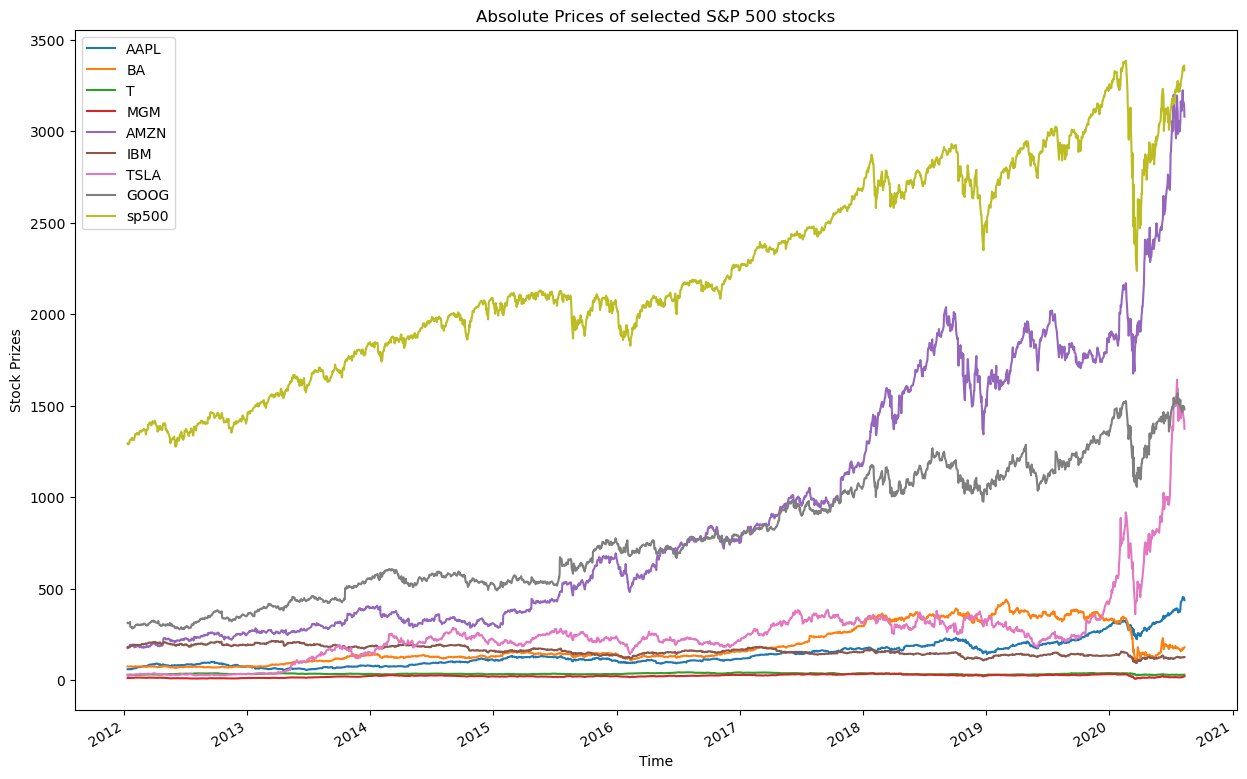

In [505]:
plot_data(df)

## Task 3 : Print out normalized (scaled) stock prices

In [506]:
def norm_price_startdate(df):
    df=df/df.iloc[0]*100
    return df

In [507]:
df_norm =norm_price_startdate(df)

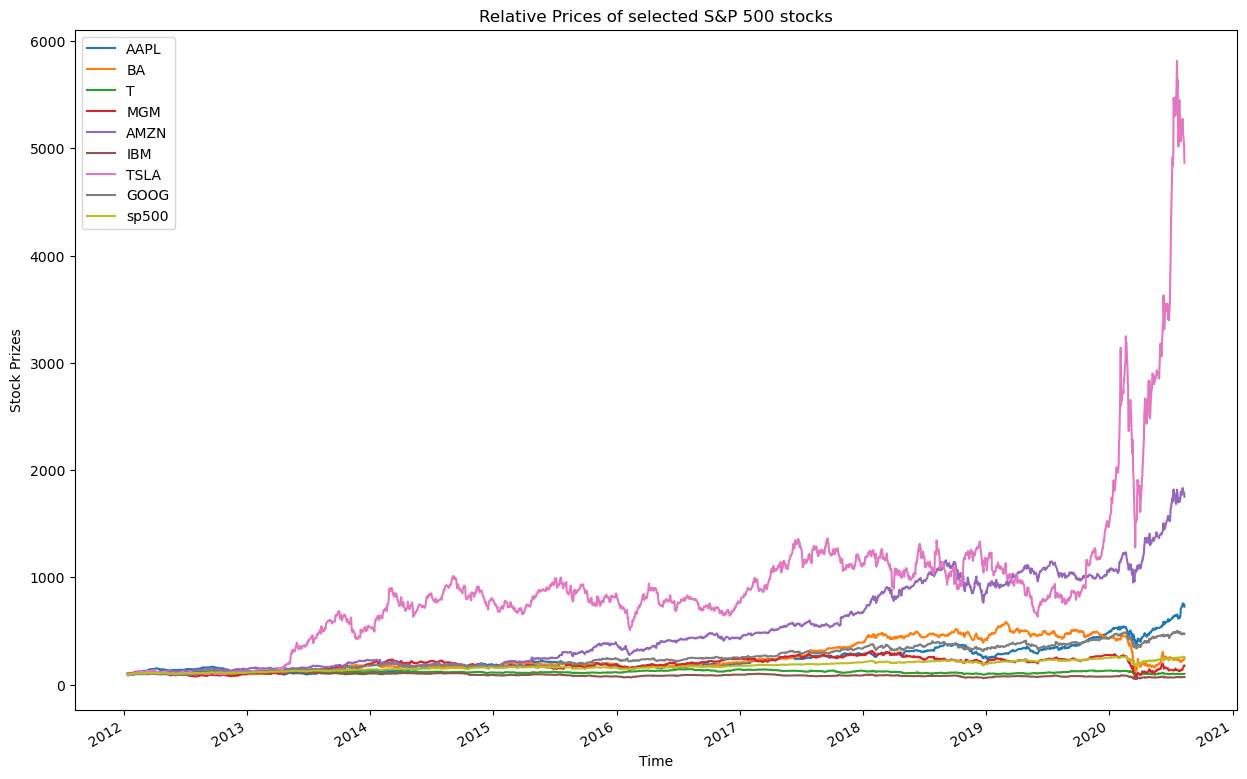

In [508]:
plot_data(df_norm, title = 'Relative Prices of selected S&P 500 stocks')

In [509]:
import plotly.express as px

def plot_ex(df, title, log_y=False): 
    fig = px.line(df, line_shape="spline",title= title, log_y=log_y, range_x = (df.index.min(), df.index.max()),   )
    fig.show()
    return 

In [510]:
plot_ex(df_norm, title = 'Interactive Chart of Relative Prices (in Log Scale) of selected S&P 500 stocks', log_y=True)


## Task #5 : Calculate stock returns (1)
• Define a function to calculate stocks daily returns (for all stocks) 
– Loop through each stock
– Loop through each row belonging to the stock 
• Plotit!

In [511]:
def calculate_daily_returns(df):
    # Create a new df as a copy
    returns_df = df.copy()
    #  first Loop through each stock 
    for stock in df.columns:
        # Initialize the first value as 0 (no past values)
        returns_df[stock].iloc[0] = 0
        # Loop through each day's price, starting from second
        for i in range(1, len(df)):
            # Calculate the daily return: (current day's price - previous day's price) / previous day's price
            previous_price = df[stock].iloc[i-1]
            current_price = df[stock].iloc[i]
            daily_return = (current_price - previous_price) / previous_price
            # Replace
            returns_df[stock].iloc[i] = daily_return
    return returns_df


In [512]:
df_dayly_return=calculate_daily_returns(df)
df_dayly_return

AAPL        BA         T       MGM      AMZN       IBM  \
Date                                                                     
2012-01-12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2012-01-13 -0.003749 -0.012051 -0.001660  0.018137  0.014153 -0.007699   
2012-01-17  0.011648  0.008579  0.005986 -0.008097  0.018159  0.004689   
2012-01-18  0.010384 -0.002392  0.002645  0.039184  0.042827  0.005944   
2012-01-19 -0.003169  0.006661  0.002967  0.005499  0.026446 -0.003038   
...              ...       ...       ...       ...       ...       ...   
2020-08-05  0.003625  0.055794 -0.005332  0.000000  0.021091 -0.003099   
2020-08-06  0.034889 -0.011935 -0.000335  0.104067  0.006231  0.005341   
2020-08-07 -0.024495 -0.012660  0.006032  0.030878 -0.017842 -0.009198   
2020-08-10  0.014535  0.055229  0.005996  0.137677 -0.006093  0.017206   
2020-08-11 -0.029740  0.004013  0.000000 -0.006928 -0.021438 -0.002832   

                TSLA      GOOG     sp500  
Date                                      
2012-01-12  0.000000  0.000000  0.000000  
2012-01-13 -0.193274 -0.007385 -0.004948  
2012-01-17  0.167179  0.005744  0.003553  
2012-01-18  0.007895  0.006889  0.011108  
2012-01-19 -0.001865  0.010523  0.004939  
...              ...       ...       ...  
2020-08-05 -0.001332  0.005898  0.006430  
2020-08-06  0.003071  0.017976  0.006428  
2020-08-07 -0.024752 -0.003740  0.000633  
2020-08-10 -0.023501  0.001077  0.002742  
2020-08-11 -0.031144 -0.010547 -0.007969  

[2159 rows x 9 columns]

In [513]:
plot_ex(df_dayly_return, title='Dayly Return of sleected Stocks in S&P 500')

## Task #5 : Calculate stock returns (2)
• Calculate the correlations between daily returns
• Plot the correlation table as in heat-map


In [514]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_and_plot_correlation(returns_df):
    # Calculate the correlation matrix for daily returns
    corr_df = returns_df.corr()
    # Plotting the heatmap using matplotlib
    fig, ax = plt.subplots(figsize=(10, 8))
    # Create a heatmap using matshow()
    cax = ax.matshow(corr_df, cmap='coolwarm')
    # Add color bar
    fig.colorbar(cax)
    # Set axis labels and ticks
    ax.set_xticks(np.arange(len(corr_df.columns)))
    ax.set_yticks(np.arange(len(corr_df.columns)))
    ax.set_xticklabels(corr_df.columns, rotation=45, ha="left")
    ax.set_yticklabels(corr_df.columns)
    # Add annotations (correlation values) inside the heatmap
    for i in range(len(corr_df.columns)):
        for j in range(len(corr_df.columns)):
            plt.text(j, i, f'{corr_df.iloc[i, j]:.2f}', ha='center', va='center', color='black')
    # Set title
    plt.title('Correlation Heatmap of Stock Returns')
    
    # Show the heatmap
    plt.show()
    
    return corr_df

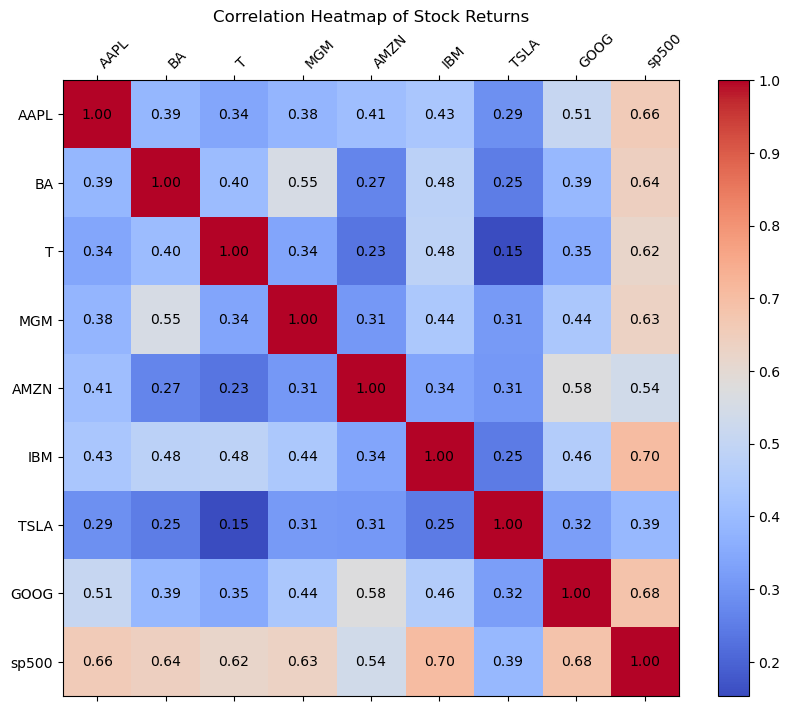

In [515]:
df_corr = calculate_and_plot_correlation(df_dayly_return.dropna())

• What are the top 2 stocks that are positively correlated with the S&P500 ?

In [516]:
df_corr['sp500'].sort_values(ascending=False)[1:4]

IBM     0.703935
GOOG    0.684572
AAPL    0.657321
Name: sp500, dtype: float64

• What is the correlation between Amazon and Boeing ? Comment on your answer 

In [517]:
df_corr['AMZN']['BA']

0.26746613808364733

• What is the correlation between MGM and Boeing ? Comment on your answer


In [518]:
df_corr['MGM']['BA']

0.5542294514206463

## Task #5 : Calculate stock returns (3)
• Plot the histograms of daily returns and comment


In [519]:
histo_dayly_return = px.histogram(df_dayly_return, title= "Histogramm of dayly returns of Stocks", nbins=500 )
histo_dayly_return.show()

• Optional : Define a function to perform an interactive and fancy histograms plots using Plotly
– Plotly’s Python API contains a super powerful module known as figure factory module

In [520]:
import plotly.figure_factory as ff


# Function to create interactive and fancy histogram plots from a DataFrame
def histogram_plot(df,title = "Histogram" , bin_size=0.5, show_hist=True, show_curve=True, show_rug=False):
    """
    Plots an interactive and fancy histogram using Plotly's figure factory from a DataFrame.
    Parameters:
    - df: A pandas DataFrame where each column represents a dataset to plot as histograms.
    - bin_size: The size of each histogram bin (default is 0.2).
    - show_curve: Whether to show a kernel density estimate curve (default is True).
    - show_rug: Whether to show the rug plot below the histogram (default is False).
    - curve_color: Color of the density curve (default is 'blue').
    """
    # Extract data and labels from DataFrame
    data = [df[col] for col in df.columns]
    labels = df.columns.tolist()

    # Create the distribution plot
    fig = ff.create_distplot(
        data, 
        labels, 
        bin_size=bin_size, 
        show_hist=show_hist, 
        show_curve=show_curve, 
        show_rug=show_rug 
    )

    # Customize the layout
    fig.update_layout(
        title = title,
        xaxis_title="Value",
        yaxis_title="Density",
        legend_title="Variables",
    )
    # Show the plot
    fig.show()


In [521]:
histogram_plot(df_dayly_return ,title= "histogtam of dayly returns" , bin_size=0.2, show_curve=True, show_rug=True, show_hist=False)


## Task #6 : Portfolio weights
Simulation exercise
• Write a function that will :
– Simulate 1000 portfolios with random weights
– Compute the return, the variance and the Sharpe ratio of each portfolio – Return the maximum Sharpe ratio and its weights

In [522]:
import yfinance as yf


def calc_total_return(df):
    return (df.loc[df.index.max()] / df.loc[df.index.min()]) - 1

# Compute portfolio performance (return, volatility)
def portfolio_performance(weights, total_return, cov_matrix, n_days):
    portfolio_return = np.dot(weights, total_return)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))*n_days)
    return portfolio_return, portfolio_volatility

# Function to calculate risk-free rate for the period matching the stock data
def get_risk_free_rate_for_period(stock_data):
    """
    Fetch the historical risk-free rate (US 3-month Treasury Bill yield)
    over the same period as the stock data.
    """
    start_date = stock_data.index.min().strftime('%Y-%m-%d')
    end_date = stock_data.index.max().strftime('%Y-%m-%d')
    
    # Fetch 3-month US Treasury Bond Yield (^IRX) for the matching period
    treasury_data = yf.download("^IRX", start=start_date, end=end_date)
    
    if treasury_data.empty:
        raise ValueError("No treasury data available for the selected period.")
    
    # Convert annualized yield to daily yield (assuming 252 trading days per year)
    treasury_data['Daily Risk-Free Rate'] = treasury_data['Close'] / 100 / 252
    # return treasury_data['Daily Risk-Free Rate'].apply(calc_total_return)
    
    # We give up on this. Assume a 3% annual risk-free rate of return
    return (1/(1+0.03)**252) # assuming 252 trading days per year

# Simulate portfolios, calculate mean_returns, cov_matrix, and risk-free rate within the function
def simulate_portfolios(stock_data, num_portfolios=10000):
    """
    Simulate portfolios with random weights, calculate return, volatility, and Sharpe ratio.
    Returns the results and the maximum Sharpe ratio portfolio.
    
    Parameters:
    - stock_data: DataFrame containing stock prices with dates as index
    - num_portfolios: Number of portfolios to simulate (default: 1000)
    """
    # Calculate daily returns of the stocks
    daily_returns = stock_data.pct_change().dropna()
    # Calculate mean returns and covariance matrix
    total_return = stock_data.apply(calc_total_return)
    cov_matrix = daily_returns.cov()
    # Get risk-free rate for the period based on stock data's index range
    risk_free_rate = get_risk_free_rate_for_period(stock_data)
    print(f"Risk-Free Rate (Daily): {risk_free_rate:.6f}")
    
    num_assets = len(total_return)
    results = np.zeros((3, num_portfolios))  # Store return, volatility, Sharpe ratio
    weights_record = []

    for i in range(num_portfolios):
        # Generate random weights and normalize them
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)

        # Portfolio return and volatility
        portfolio_return, portfolio_volatility = portfolio_performance(weights, total_return, cov_matrix, len(stock_data))
        # Sharpe ratio calculation with risk-free rate
        sharpe_ratio = (portfolio_return - risk_free_rate) / (portfolio_volatility)
        # Store the results
        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility
        results[2, i] = sharpe_ratio

    # Find the portfolio with the maximum Sharpe ratio
    max_sharpe_idx = np.argmax(results[2])
    max_sharpe_weights = weights_record[max_sharpe_idx]

    return results, weights_record, max_sharpe_idx, max_sharpe_weights, total_return, cov_matrix, risk_free_rate

# Example usage:
# Assuming you have a 'stock_data' DataFrame with your stock prices (indexed by date)
results, weights_record, max_sharpe_idx, max_sharpe_weights, total_return, cov_matrix, risk_free_rate = simulate_portfolios(df)

print(f"Maximum Sharpe Ratio Portfolio Weights: {max_sharpe_weights}")
print(f"Maximum Sharpe Ratio: {results[2, max_sharpe_idx]}")


[*********************100%%**********************]  1 of 1 completed


Risk-Free Rate (Daily): 0.000582
Maximum Sharpe Ratio Portfolio Weights: [1.04604416e-02 2.09191766e-01 9.11361537e-02 2.74609716e-01
 1.99799364e-02 2.17672334e-01 5.51138961e-05 6.26909361e-03
 1.70625445e-01]
Maximum Sharpe Ratio: 0.017745229158371074


In [523]:
# pure apple portfolio
total_return = df.apply(calc_total_return)
daily_returns = df.pct_change().dropna()
cov_matrix = daily_returns.cov()

portfolio_performance(np.array([1,0,0,0,0,0,0,0,0]), total_return, cov_matrix, len(df))


(6.267614496490531, 0.8253017092836287)

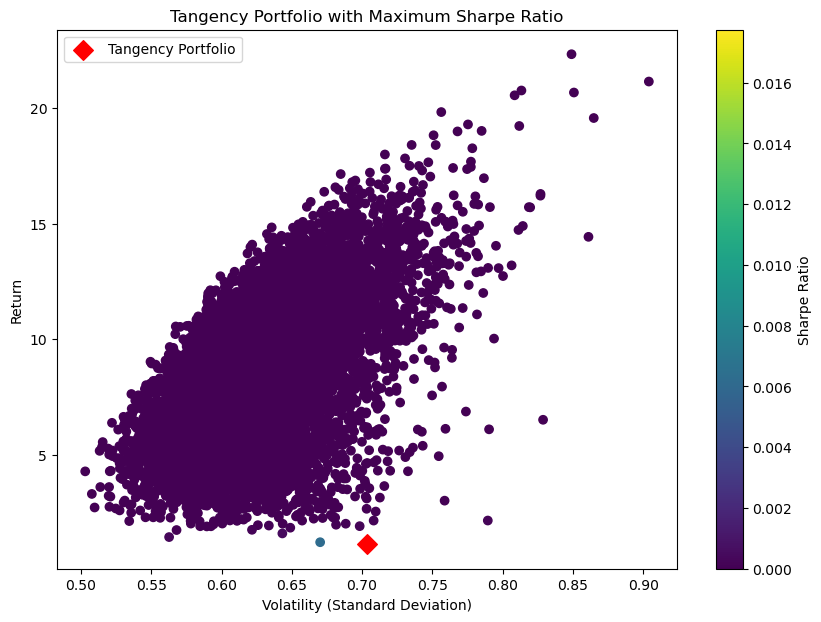

In [524]:
import matplotlib.pyplot as plt

# Function to plot the tangency portfolio
def plot_tangency_portfolio(results, max_sharpe_idx, weights_record):
    plt.figure(figsize=(10, 7))

    # Scatter plot of simulated portfolios
    plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
    plt.colorbar(label='Sharpe Ratio')

    # Highlight the maximum Sharpe ratio portfolio (tangency portfolio)
    plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], c='red', marker='D', s=100, label='Tangency Portfolio')

    plt.title('Tangency Portfolio with Maximum Sharpe Ratio')
    plt.xlabel('Volatility (Standard Deviation)')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

# Example usage:
plot_tangency_portfolio(results, max_sharpe_idx, weights_record)


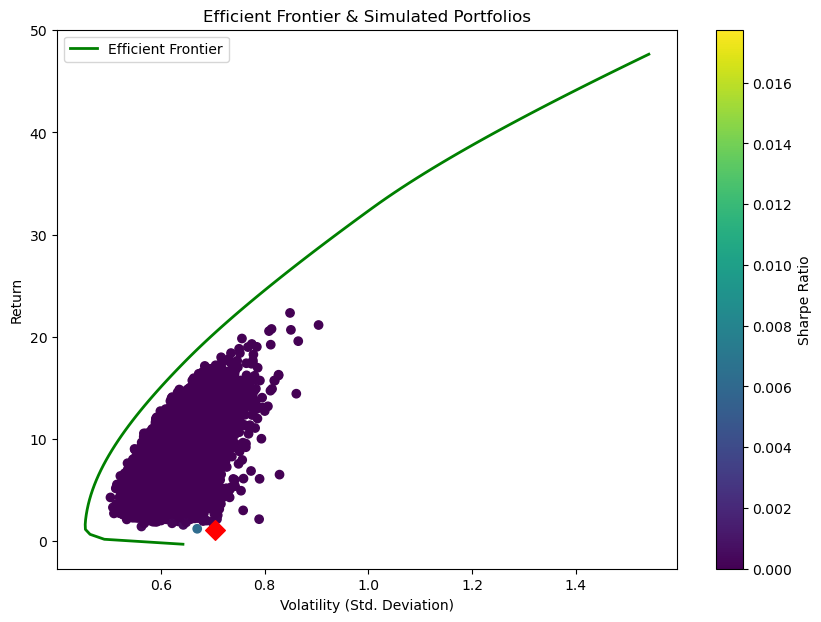

In [525]:
from scipy.optimize import minimize

# Minimize portfolio volatility for a given target return
def minimize_volatility(total_return, cov_matrix, target_return):
    num_assets = len(total_return)
    initial_weights = np.array([1. / num_assets] * num_assets)  # Initial guess (equal weights)
    
    # Constraints: weights sum to 1 and portfolio return equals target return
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Sum of weights must be 1
                   {'type': 'eq', 'fun': lambda w: np.dot(w, total_return) - target_return}]  # Return constraint
    
    # Bounds for each weight (between 0 and 1)
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    # Minimize portfolio volatility
    result = minimize(lambda w: portfolio_performance(w, total_return, cov_matrix, 252*8)[1], # 8 years and 252 trading days each year
                      initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Efficient frontier: Find portfolios for various target returns
def calculate_efficient_frontier(total_return, cov_matrix, num_points=100):
    target_returns = np.linspace(min(total_return), max(total_return), num_points)
    frontier_volatility = []
    for target_return in target_returns:
        result = minimize_volatility(total_return, cov_matrix, target_return)
        portfolio_return, portfolio_volatility = portfolio_performance(result.x, total_return, cov_matrix, 252*8)
        frontier_volatility.append(portfolio_volatility)
    return target_returns, frontier_volatility

# Plot the efficient frontier against the simulated portfolios
def plot_efficient_frontier(results, max_sharpe_idx, target_returns, efficient_volatilities):
    plt.figure(figsize=(10, 7))
    # Scatter plot of portfolios
    plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
    plt.colorbar(label='Sharpe Ratio')
    # Highlight the maximum Sharpe ratio portfolio
    plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], c='red', marker='D', s=100)
    # Plot the efficient frontier
    plt.plot(efficient_volatilities, target_returns, 'g-', linewidth=2, label='Efficient Frontier')
    plt.title('Efficient Frontier & Simulated Portfolios')
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Return')
    plt.legend()
    plt.show()
# Example usage:
target_returns, efficient_volatilities = calculate_efficient_frontier(total_return, cov_matrix)
plot_efficient_frontier(results, max_sharpe_idx, target_returns, efficient_volatilities)


• What are the weights of your tangency portfolio ? What would have been the performance of this portfolio over the sample period ? Plot it !


## Task #7 : Testing Portfolio Theory - Optional

• Re-run Task #6 but only on the first part of the sample (2012-2016)
• Find out what are the optimal weights for this period
• Simulate your optimal portfolio on the second part of the sample (2016-end)
– How does it perform?
– Plot the expected (measured over the 1st period) vs. the realized return and
volatility (over the second).


In [526]:
def run_task_4(stock_data):
    """
    Task 4: Optimized portfolio based on 2012-2016 data, and evaluate its performance on 2016-end period.
    
    - Find optimized portfolio based on 2012-2016 period
    - Compare its performance on 2016-end period to an equal-weight portfolio.
    """
    # Split data into two periods
    stock_data_first = stock_data.loc['2012':'2016']
    stock_data_second = stock_data.loc['2016':]

    # Simulate for the first period (2012-2016)
    results_first, weights_record_first, _, max_sharpe_weights_first, total_returns_first, cov_matrix_first, _ = simulate_portfolios(stock_data_first)
    
    # Optimized portfolio performance expected in second period
    expected_return_opt, expected_volatility_opt = portfolio_performance(max_sharpe_weights_first, total_returns_first, cov_matrix_first, len(stock_data_first))
    
    # True performance of optimized portfolio in second period
    total_returns_second = stock_data_second.apply(calc_total_return)
    cov_matrix_second = stock_data_second.pct_change().dropna().cov()
    true_return_opt, true_volatility_opt = portfolio_performance(max_sharpe_weights_first, total_returns_second, cov_matrix_second, len(stock_data_second))
    
    # Equal-weight portfolio
    equal_weights = np.ones(len(stock_data_first.columns)) / len(stock_data_first.columns)
    
    # Expected performance of equal-weight portfolio based on 2012-2016
    expected_return_eq, expected_volatility_eq = portfolio_performance(equal_weights, total_returns_first, cov_matrix_first, len(stock_data_first))
    
    # True performance of equal-weight portfolio in second period (2016-end)
    true_return_eq, true_volatility_eq = portfolio_performance(equal_weights, total_returns_second, cov_matrix_second, len(stock_data_second))
    
    # Output results
    print(f"--- Optimized Portfolio (2012-2016) ---")
    print(f"Expected Return (2016-End): {expected_return_opt:.4f}")
    print(f"Expected Volatility (2016-End): {expected_volatility_opt:.4f}")
    print(f"True Return (2016-End): {true_return_opt:.4f}")
    print(f"True Volatility (2016-End): {true_volatility_opt:.4f}")
    
    print(f"\n--- Equal Weights Portfolio ---")
    print(f"Expected Return (2016-End): {expected_return_eq:.4f}")
    print(f"Expected Volatility (2016-End): {expected_volatility_eq:.4f}")
    print(f"True Return (2016-End): {true_return_eq:.4f}")
    print(f"True Volatility (2016-End): {true_volatility_eq:.4f}")
    
    # Plot comparison of expected vs. realized returns for both portfolios
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.bar(['Optimized Expected', 'Optimized Realized', 'Equal Weight Expected', 'Equal Weight Realized'],
           [expected_return_opt, true_return_opt, expected_return_eq, true_return_eq], color=['blue', 'blue', 'green', 'green'])
    ax.set_ylabel('Return')
    ax.set_title('Expected vs Realized Returns (Optimized vs Equal Weight)')
    plt.show()


[*********************100%%**********************]  1 of 1 completed


Risk-Free Rate (Daily): 0.000582
--- Optimized Portfolio (2012-2016) ---
Expected Return (2016-End): 0.5686
Expected Volatility (2016-End): 0.2990
True Return (2016-End): 0.2354
True Volatility (2016-End): 0.4875

--- Equal Weights Portfolio ---
Expected Return (2016-End): 1.7455
Expected Volatility (2016-End): 0.3629
True Return (2016-End): 1.5392
True Volatility (2016-End): 0.5200


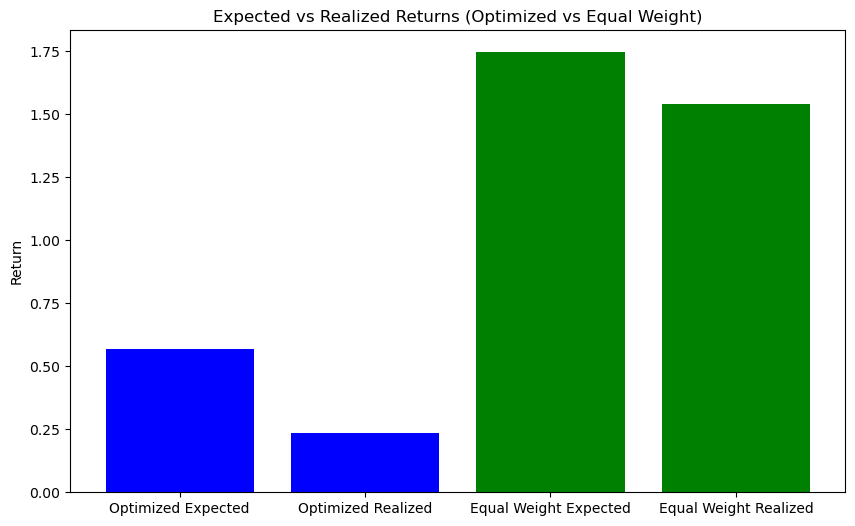

In [527]:
run_task_4(df)

In [528]:
def rebalance_yearly(stock_data):
    """
    Task 5: Rebalance portfolio yearly based on last year's data.
    
    - Optimized portfolio based on the previous year's performance
    - Compare its performance with an equal-weight portfolio for each year
    """
    years = stock_data.index.year.unique()
    yearly_results = []
    
    for year in years[1:]:  
        stock_data_year = stock_data.loc[str(year-1)]
        stock_data_next_year = stock_data.loc[str(year)]

        # Simulate for the current year to get the optimal portfolio based on that year
        results, weights_record, _, max_sharpe_weights, total_returns_year, cov_matrix_year, _ = simulate_portfolios(stock_data_year)
        # Expected performance of optimized portfolio in the next year
        expected_return_opt, expected_volatility_opt = portfolio_performance(max_sharpe_weights, total_returns_year, cov_matrix_year, len(stock_data_year))
        # True performance of optimized portfolio in the next year
        total_returns_next_year = stock_data_next_year.apply(calc_total_return)
        cov_matrix_next_year = stock_data_next_year.pct_change().dropna().cov()
        true_return_opt, true_volatility_opt = portfolio_performance(max_sharpe_weights, total_returns_next_year, cov_matrix_next_year, len(stock_data_next_year))
        # Equal weight portfolio
        equal_weights = np.ones(len(stock_data_year.columns)) / len(stock_data_year.columns)
        # Expected performance of equal-weight portfolio based on current year
        expected_return_eq, expected_volatility_eq = portfolio_performance(equal_weights, total_returns_year, cov_matrix_year, len(stock_data_year))
        # True performance of equal-weight portfolio in the next year
        true_return_eq, true_volatility_eq = portfolio_performance(equal_weights, total_returns_next_year, cov_matrix_next_year, len(stock_data_next_year))
        # Store the results for comparison
        yearly_results.append({
            'Year': year ,
            'Expected Return Opt': expected_return_opt,
            'Expected Volatility Opt': expected_volatility_opt,
            'True Return Opt': true_return_opt,
            'True Volatility Opt': true_volatility_opt,
            'Expected Return Eq': expected_return_eq,
            'Expected Volatility Eq': expected_volatility_eq,
            'True Return Eq': true_return_eq,
            'True Volatility Eq': true_volatility_eq
        })

        # Output for each year
        print(f"\n--- Year {year } ---")
        print(f"Expected Return Optimized Portfolio: {expected_return_opt:.4f}")
        print(f"Expected Volatility Optimized Portfolio: {expected_volatility_opt:.4f}")
        print(f"Expected Sharpe Ratio Optimized Portfolio: {(expected_return_opt - 0.03) / expected_volatility_opt:.4f}")
        print(f"\nTrue Return Optimized Portfolio: {true_return_opt:.4f}")
        print(f"True Volatility Optimized Portfolio: {true_volatility_opt:.4f}")
        print(f"True Sharpe Ratio Optimized Portfolio: {(true_volatility_opt - 0.03) / true_volatility_opt:.4f}")
        
        print(f"\nExpected Return Equal Weight Portfolio: {expected_return_eq:.4f}")
        print(f"Expected Volatility Equal Weight Portfolio: {expected_volatility_eq:.4f}")
        print(f"\nTrue Return Equal Weight Portfolio: {true_return_eq:.4f}")
        print(f"True Volatility Equal Weight Portfolio: {true_volatility_eq:.4f}")

    # Plot comparison of expected vs realized returns and volatilities
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    
    years_range = [year for year in years[1:]]
    
    # Return comparison
    ax[0].plot(years_range, [result['Expected Return Opt'] for result in yearly_results], label='Optimized Expected', marker='o')
    ax[0].plot(years_range, [result['True Return Opt'] for result in yearly_results], label='Optimized Realized', marker='x')
    ax[0].plot(years_range, [result['Expected Return Eq'] for result in yearly_results], label='Equal Weight Expected', marker='o')
    ax[0].plot(years_range, [result['True Return Eq'] for result in yearly_results], label='Equal Weight Realized', marker='x')
    ax[0].set_ylabel('Return')
    ax[0].set_title('Expected vs Realized Returns (Optimized vs Equal Weight)')
    ax[0].legend()
    
    # Volatility comparison
    ax[1].plot(years_range, [result['Expected Volatility Opt'] for result in yearly_results], label='Optimized Expected', marker='o')
    ax[1].plot(years_range, [result['True Volatility Opt'] for result in yearly_results], label='Optimized Realized', marker='x')
    ax[1].plot(years_range, [result['Expected Volatility Eq'] for result in yearly_results], label='Equal Weight Expected', marker='o')
    ax[1].plot(years_range, [result['True Volatility Eq'] for result in yearly_results], label='Equal Weight Realized', marker='x')
    ax[1].set_ylabel('Volatility')
    ax[1].set_title('Expected vs Realized Volatility (Optimized vs Equal Weight)')
    ax[1].legend()
    
    plt.show()


[*********************100%%**********************]  1 of 1 completed


Risk-Free Rate (Daily): 0.000582


[*********************100%%**********************]  1 of 1 completed


--- Year 2013 ---
Expected Return Optimized Portfolio: 0.0481
Expected Volatility Optimized Portfolio: 0.1797
Expected Sharpe Ratio Optimized Portfolio: 0.1008

True Return Optimized Portfolio: 0.6309
True Volatility Optimized Portfolio: 0.1502
True Sharpe Ratio Optimized Portfolio: 0.8003

Expected Return Equal Weight Portfolio: 0.1389
Expected Volatility Equal Weight Portfolio: 0.1639

True Return Equal Weight Portfolio: 0.6986
True Volatility Equal Weight Portfolio: 0.1418
Risk-Free Rate (Daily): 0.000582



[*********************100%%**********************]  1 of 1 completed


--- Year 2014 ---
Expected Return Optimized Portfolio: 0.2002
Expected Volatility Optimized Portfolio: 0.1289
Expected Sharpe Ratio Optimized Portfolio: 1.3199

True Return Optimized Portfolio: 0.0464
True Volatility Optimized Portfolio: 0.1323
True Sharpe Ratio Optimized Portfolio: 0.7733

Expected Return Equal Weight Portfolio: 0.6986
Expected Volatility Equal Weight Portfolio: 0.1418

True Return Equal Weight Portfolio: 0.0453
True Volatility Equal Weight Portfolio: 0.1562
Risk-Free Rate (Daily): 0.000582



[*********************100%%**********************]  1 of 1 completed


--- Year 2015 ---
Expected Return Optimized Portfolio: 0.0006
Expected Volatility Optimized Portfolio: 0.1554
Expected Sharpe Ratio Optimized Portfolio: -0.1890

True Return Optimized Portfolio: 0.1312
True Volatility Optimized Portfolio: 0.1968
True Sharpe Ratio Optimized Portfolio: 0.8476

Expected Return Equal Weight Portfolio: 0.0453
Expected Volatility Equal Weight Portfolio: 0.1562

True Return Equal Weight Portfolio: 0.1944
True Volatility Equal Weight Portfolio: 0.1867
Risk-Free Rate (Daily): 0.000582



[*********************100%%**********************]  1 of 1 completed


--- Year 2016 ---
Expected Return Optimized Portfolio: 0.0037
Expected Volatility Optimized Portfolio: 0.1797
Expected Sharpe Ratio Optimized Portfolio: -0.1463

True Return Optimized Portfolio: 0.1355
True Volatility Optimized Portfolio: 0.1511
True Sharpe Ratio Optimized Portfolio: 0.8014

Expected Return Equal Weight Portfolio: 0.1944
Expected Volatility Equal Weight Portfolio: 0.1867

True Return Equal Weight Portfolio: 0.1387
True Volatility Equal Weight Portfolio: 0.1558
Risk-Free Rate (Daily): 0.000582



[*********************100%%**********************]  1 of 1 completed


--- Year 2017 ---
Expected Return Optimized Portfolio: 0.0573
Expected Volatility Optimized Portfolio: 0.1813
Expected Sharpe Ratio Optimized Portfolio: 0.1508

True Return Optimized Portfolio: 0.4455
True Volatility Optimized Portfolio: 0.1377
True Sharpe Ratio Optimized Portfolio: 0.7821

Expected Return Equal Weight Portfolio: 0.1387
Expected Volatility Equal Weight Portfolio: 0.1558

True Return Equal Weight Portfolio: 0.3102
True Volatility Equal Weight Portfolio: 0.1024
Risk-Free Rate (Daily): 0.000582



[*********************100%%**********************]  1 of 1 completed


--- Year 2018 ---
Expected Return Optimized Portfolio: 0.0928
Expected Volatility Optimized Portfolio: 0.1126
Expected Sharpe Ratio Optimized Portfolio: 0.5572

True Return Optimized Portfolio: -0.2063
True Volatility Optimized Portfolio: 0.2143
True Sharpe Ratio Optimized Portfolio: 0.8600

Expected Return Equal Weight Portfolio: 0.3102
Expected Volatility Equal Weight Portfolio: 0.1024

True Return Equal Weight Portfolio: -0.0658
True Volatility Equal Weight Portfolio: 0.2242
Risk-Free Rate (Daily): 0.000582



C:\Users\PetterMoger\AppData\Local\Temp\ipykernel_31116\3956770035.py:67: RuntimeWarning:

invalid value encountered in scalar power

[*********************100%%**********************]  1 of 1 completed


--- Year 2019 ---
Expected Return Optimized Portfolio: -0.1217
Expected Volatility Optimized Portfolio: 0.2210
Expected Sharpe Ratio Optimized Portfolio: -0.6862

True Return Optimized Portfolio: 0.3577
True Volatility Optimized Portfolio: 0.1696
True Sharpe Ratio Optimized Portfolio: 0.8231

Expected Return Equal Weight Portfolio: -0.0658
Expected Volatility Equal Weight Portfolio: 0.2242

True Return Equal Weight Portfolio: 0.3097
True Volatility Equal Weight Portfolio: 0.1652
Risk-Free Rate (Daily): 0.000582



--- Year 2020 ---
Expected Return Optimized Portfolio: 0.1860
Expected Volatility Optimized Portfolio: 0.1819
Expected Sharpe Ratio Optimized Portfolio: 0.8578

True Return Optimized Portfolio: 0.1830
True Volatility Optimized Portfolio: 0.4711
True Sharpe Ratio Optimized Portfolio: 0.9363

Expected Return Equal Weight Portfolio: 0.3097
Expected Volatility Equal Weight Portfolio: 0.1652

True Return Equal Weight Portfolio: 0.2525
True Volatility Equal Weight Portfolio: 0.3997


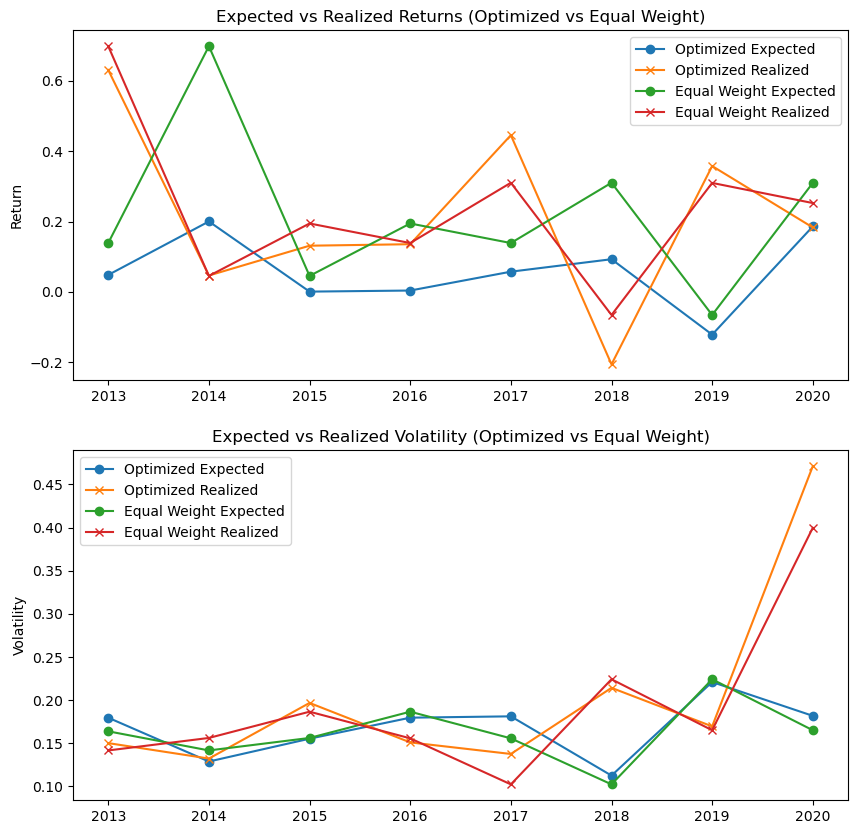

In [529]:
rebalance_yearly(df)
